In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

# Чтение датасета и разбиение на train/test

In [4]:
import pandas as pd


dataset = pd.read_csv("processed_dataset.csv", index_col=0)
dataset = dataset.sample(frac=1, replace=False)

X = dataset.drop(columns="RainTomorrow").to_numpy()
y = dataset["RainTomorrow"].to_numpy()

X_train = X[:-20000]
y_train = y[:-20000]
X_test = X[-20000:]
y_test = y[-20000:]

# Загрузка и обучение моделей

In [5]:
from classifier import LinearClassifier

model = LinearClassifier(l2_reg_param=0.1, learning_rate=0.05, Q_param=1/len(X), gamma=0.9)
loss = model.fit(X, y, n_iters=30, batch_size=10000, stop_threshold=0.0001, weights_init_method="random", batch_generation="margin")

Initial weights: [-1.04024237 -1.19586253  0.35589365  0.44822749  1.08253006  0.35209383
  0.85268134  0.586883    0.35480996  0.89210608 -0.28317449  0.89920195
  0.5016015 ]
Initial Q: 1.6135684032338815
Iteration 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 99804.78it/s]


Iteration 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 100050.13it/s]


Iteration 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 102991.96it/s]


Iteration 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 102981.58it/s]


Iteration 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 105619.77it/s]


Iteration 6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 99704.17it/s]


Iteration 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 100325.13it/s]


Iteration 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 102247.79it/s]


Iteration 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 106902.54it/s]

Early stopping by Q
Final weights: self.weights=array([ 0.14209998, -0.13303939,  0.06424452,  0.04309129,  0.31518519,
       -0.12637262,  0.01479531,  0.28106722,  0.02157101, -0.14559328,
       -0.0865769 ,  0.52573547,  0.08652457])
Final Q: self._get_current_Q()=np.float64(0.9257471621916523)


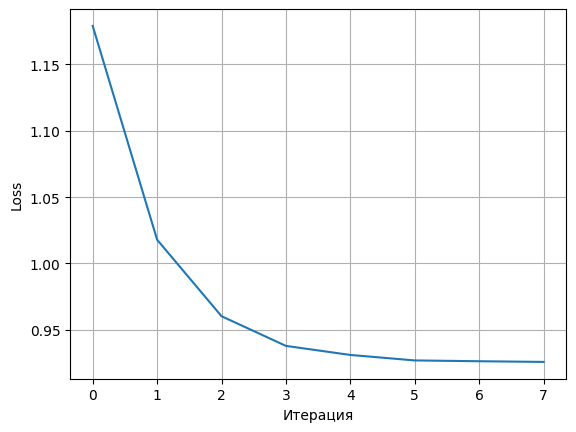

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [7]:
loss = model.fit(X, y, n_iters=30, batch_size=10000, stop_threshold=0.0001, weights_init_method="corr", batch_generation="random")

Initial weights: [ 1.84480726 -1.20351413  0.72310509  8.70210938  1.12414279 -1.67496749
 -0.15626699  0.62438412  1.10897237 -1.75053623 -0.98732183  1.78613273
  0.46340957]
Initial Q: 10.657681966438044
Iteration 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 104363.86it/s]


Iteration 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 97289.18it/s]


Iteration 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 98802.40it/s]


Iteration 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 96945.67it/s]


Iteration 5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 96082.86it/s]


Iteration 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 100771.37it/s]


Iteration 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 104007.47it/s]


Iteration 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 102425.41it/s]


Iteration 9


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 98748.31it/s]


Iteration 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 101325.31it/s]


Iteration 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 97504.73it/s]


Iteration 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 103103.94it/s]

Early stopping by Q
Final weights: self.weights=array([ 0.07377177, -0.03659063,  0.00498122,  0.02938332,  0.13368019,
       -0.1790571 ,  0.01779886,  0.57579441,  0.03425491, -0.15471503,
       -0.00795389,  0.33535985,  0.08299993])
Final Q: self._get_current_Q()=np.float64(0.9321037381569639)


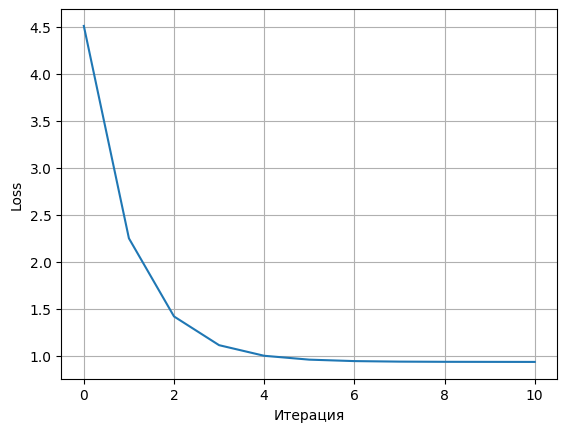

In [8]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [10]:
loss = model.fit(X, y, n_iters=30, batch_size=10000, stop_threshold=0.0001, weights_init_method="multistart", batch_generation="random", n_attempts=10)

Initial weights: [ 0.18481302 -0.21623607  0.27014567 -0.93044568  0.59408811 -0.66283205
 -0.38151129 -0.32867411  0.60303302 -0.77968554 -0.69781557  0.08210709
 -1.19436979]
Initial Q: 1.6497301223091299
Iteration 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 90194.34it/s]


Iteration 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 100823.29it/s]


Iteration 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 103697.91it/s]


Iteration 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 100888.54it/s]


Iteration 5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 94599.60it/s]


Iteration 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 101439.29it/s]


Iteration 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 104429.03it/s]


Iteration 8


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 60252.25it/s]


Iteration 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 102715.93it/s]


Iteration 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:00<00:00, 102495.03it/s]

Early stopping by Q
Final weights: self.weights=array([ 0.09195764, -0.11031476, -0.00205289, -0.0052516 ,  0.15687668,
       -0.14688612,  0.01245269,  0.49519625, -0.039064  , -0.15759136,
       -0.08076022,  0.45001209,  0.05857686])
Final Q: self._get_current_Q()=np.float64(0.9321182250000585)


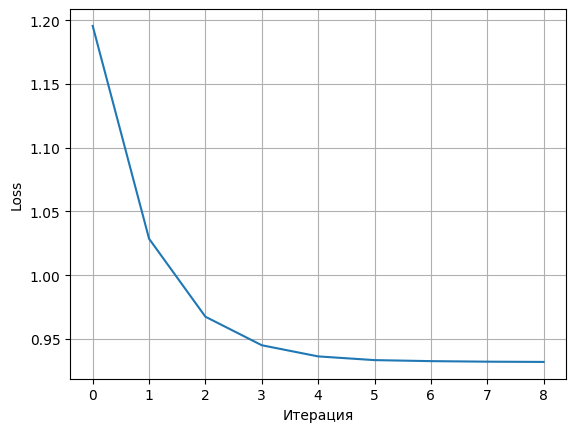

In [11]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Анализ весов модели

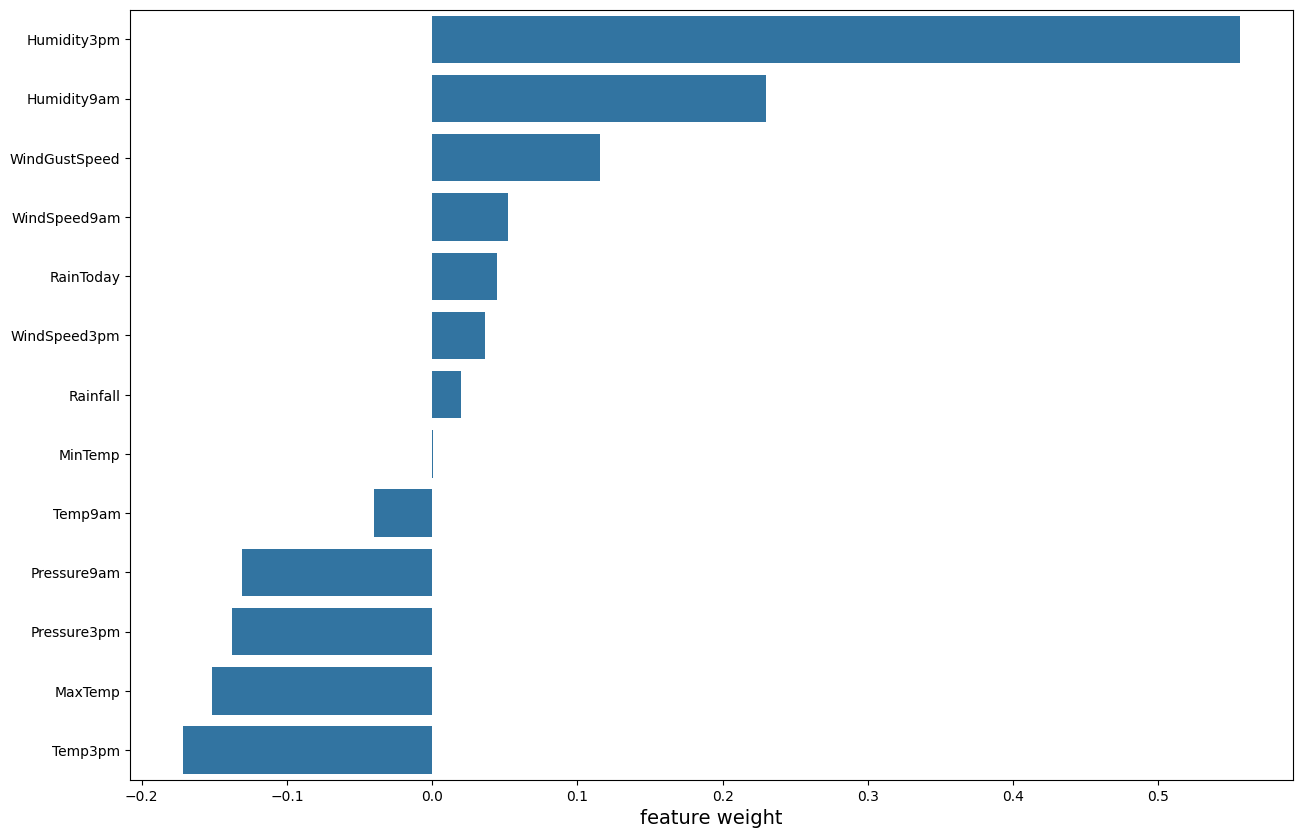

In [470]:
import seaborn as sns
import numpy as np

labels = dataset.columns.to_list()[:-1]
feature_indices = np.argsort(model.weights)[::-1]
plot = sns.barplot(y=np.array(labels)[feature_indices], x=model.weights[feature_indices])
plt.xlabel("feature weight", size="14")
plot.figure.set_size_inches(15, 10)

# Получение отступов

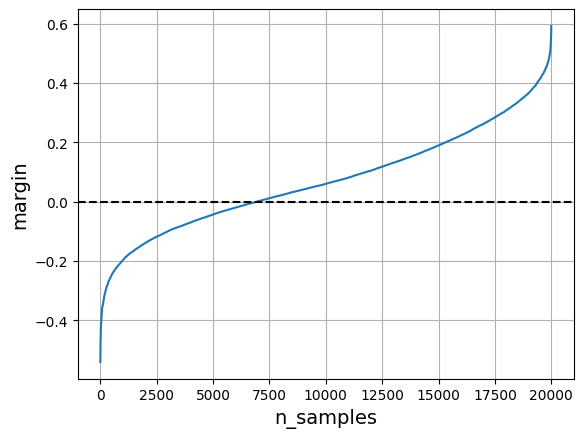

In [473]:
import matplotlib.pyplot as plt

margins = model._get_batched_margin(X_test, y_test)
margins.sort()

plt.plot(np.arange(len(margins)), margins)
plt.axline((0, 0), (2000, 0), color="black", linestyle="--")
plt.xlabel("n_samples", size="14")
plt.ylabel("margin", size="14")
plt.grid()
plt.show()

# Расчет метрик

In [474]:
from classifier import MetricsEstimator

estimator = MetricsEstimator()

In [475]:
estimator.get_metrics(y_true=y_test, y_pred=model.predict(X_test, mode="class"))

In [476]:
print(estimator)

accuracy = 0.6529
precision = 0.38039060176464756
recall = 0.8472068889379554
f1_score = 0.5250410509031199


# Обучение эталонной версии

In [206]:
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [207]:
y_pred = classifier.predict(X_test)

In [208]:
estimator.get_metrics(y_true=y_test, y_pred=y_pred)
print(estimator)

accuracy = 0.8427
precision = 0.7650440781908777
recall = 0.4407153897107529
f1_score = 0.5592602970019613
